In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# Plot settings
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.dpi'] = 100

In [3]:
input_steps = 72
output_steps = 32
batch_size = 64

## Linear extrapolation, one observation

In [4]:
source = torch.randn(input_steps)
source_idx = torch.arange(0, input_steps).float()
ones = torch.ones(input_steps)

In [5]:
y = source.clone().unsqueeze(-1)
x = torch.stack((source_idx, ones), 1)
x_t = torch.transpose(x, 0, 1)

In [6]:
y.shape

torch.Size([72, 1])

In [7]:
x.shape

torch.Size([72, 2])

In [8]:
x_t.shape

torch.Size([2, 72])

In [9]:
torch.matmul(x_t, y).shape

torch.Size([2, 1])

In [10]:
torch.linalg.inv(torch.matmul(x_t, x)).shape

torch.Size([2, 2])

In [11]:
params = torch.matmul(
    torch.matmul(x_t, y).squeeze(-1), torch.linalg.inv(torch.matmul(x_t, x))
)
slope = params[0]
constant = params[1]

In [12]:
params.shape

torch.Size([2])

In [13]:
target_idx = torch.arange(input_steps, input_steps + output_steps).float()
fitted = source_idx * slope + constant
target = target_idx * slope + constant

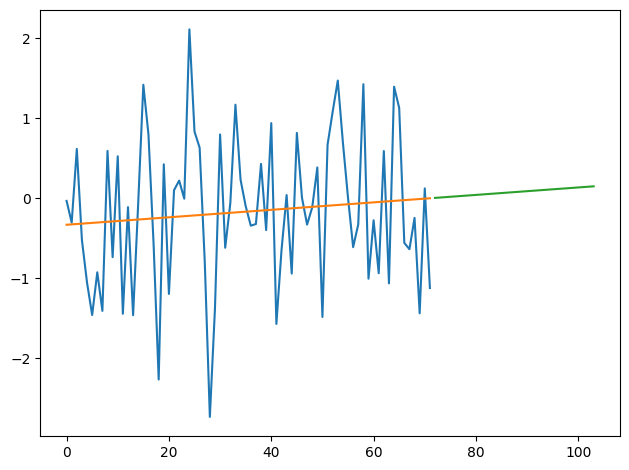

In [14]:
plt.plot(source_idx, source)
plt.plot(source_idx, fitted)
plt.plot(target_idx, target)

## Linear extrapolation, batched

In [15]:
source = torch.randn(batch_size, input_steps)
source_idx = torch.arange(0, input_steps).float()
ones = torch.ones(input_steps)

In [16]:
y = source.clone().unsqueeze(-1)
x = torch.stack((source_idx, ones), 1)
x_t = torch.transpose(x, 0, 1)

In [17]:
y.shape

torch.Size([64, 72, 1])

In [18]:
x.shape

torch.Size([72, 2])

In [19]:
x_t.shape

torch.Size([2, 72])

In [20]:
torch.matmul(x_t, y).shape

torch.Size([64, 2, 1])

In [21]:
torch.linalg.inv(torch.matmul(x_t, x)).shape

torch.Size([2, 2])

In [22]:
params = torch.matmul(
    torch.matmul(x_t, y).squeeze(-1), torch.linalg.inv(torch.matmul(x_t, x))
)
slopes = params[:, 0]
constants = params[:, 1]

In [23]:
params.shape

torch.Size([64, 2])

In [24]:
target_idx = torch.arange(input_steps, input_steps + output_steps).float()
fitted = source_idx.repeat(batch_size, 1) * slopes.unsqueeze(-1) + constants.unsqueeze(-1)
target = target_idx.repeat(batch_size, 1) * slopes.unsqueeze(-1) + constants.unsqueeze(-1)

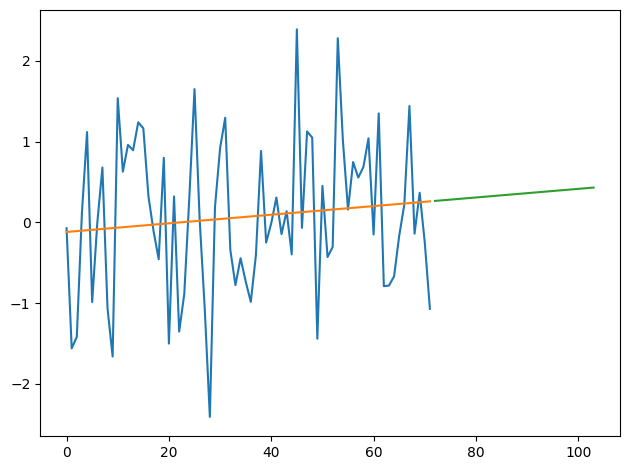

In [26]:
batch_id = 5
plt.plot(source_idx, source[batch_id])
plt.plot(source_idx, fitted[batch_id])
plt.plot(target_idx, target[batch_id])